In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_csv("/content/drive/My Drive/Online Retail.csv")
#df = df.drop(["regulatory_code","customer_id","insurer", "broker", "cobroker","insured_person"], axis=1)
df = df.dropna()
df = df[df['Quantity'] > 0]
print("loaded data")

loaded data


In [3]:
df["InvoiceDate"] = df.InvoiceDate.apply(lambda x: str(x).split(' ')[0])

dataset = df[["InvoiceDate"]].copy()
dataset = dataset.groupby(["InvoiceDate"]).size().reset_index(name='counts')
dataset["InvoiceDate"] = pd.to_datetime(dataset['InvoiceDate'])
dataset = dataset.set_index('InvoiceDate')
#dataset.to_frame()
#dataset = dataset.to_frame().reset_index()
print(dataset.index) 
print(dataset)
#y =dataset['total_premium']
y = dataset['counts'].resample('W').mean().fillna(0)


DatetimeIndex(['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-05',
               '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09',
               '2010-12-10', '2010-12-12',
               ...
               '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02',
               '2011-12-04', '2011-12-05', '2011-12-06', '2011-12-07',
               '2011-12-08', '2011-12-09'],
              dtype='datetime64[ns]', name='InvoiceDate', length=305, freq=None)
             counts
InvoiceDate        
2010-12-01     1942
2010-12-02     2000
2010-12-03     1103
2010-12-05     2708
2010-12-06     1945
...             ...
2011-12-05     3374
2011-12-06     2554
2011-12-07     2167
2011-12-08     2532
2011-12-09      617

[305 rows x 1 columns]


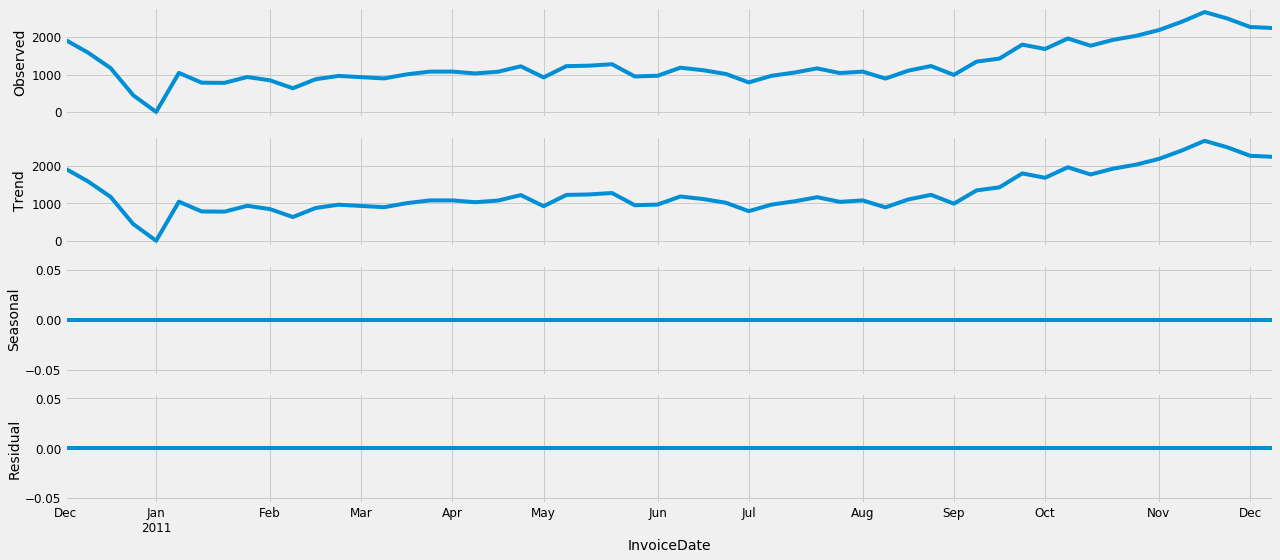

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y,freq=1, model='additive')
fig = decomposition.plot()
plt.show()

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:918.297531038413
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:719.4762519896341
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:649.5625675744737
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:473.2927258268704
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:296.85151458057277
ARIMA(0, 0, 0)x(2, 2, 0, 12)12 - AIC:107.27493637840452
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:101.8829522417281
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:98.2354489140386
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:75.0654061667479
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:61.511921764125326
ARIMA(0, 2, 0)x(2, 2, 0, 12)12 - AIC:61.21674703425403
ARIMA(0, 2, 1)x(2, 2, 0, 12)12 - AIC:58.652253675592725
ARIMA(0, 2, 2)x(2, 2, 0, 12)12 - AIC:46.087377362007416
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:33.616870907670915
ARIMA(1, 2, 0)x(2, 2, 0, 12)12

ValueError: ignored

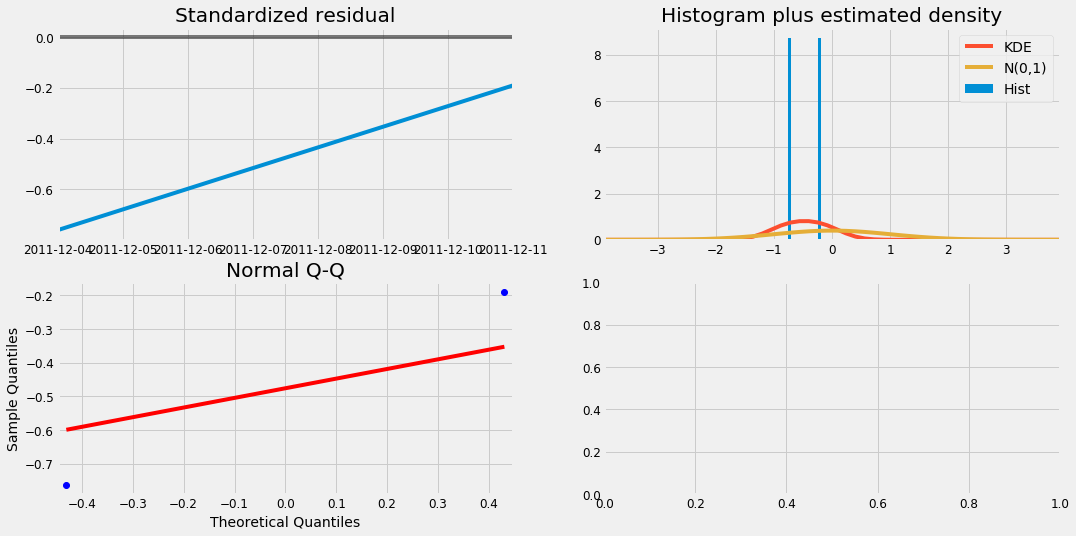

In [5]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

params = []
minAic = float('inf')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            if minAic > results.aic:
              print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
              minAic = results.aic
              params = [param,param_seasonal]
        except:
            continue
            
mod = sm.tsa.statespace.SARIMAX(y,
                                order=params[0],
                                seasonal_order=params[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
#plt.show()

In [41]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 2, 1),
                                seasonal_order=(2, 2, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
#results.plot_diagnostics(figsize=(16, 8))
#plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      2.934     -0.341      0.733      -6.750       4.750
ar.S.L12      -1.4083      0.213     -6.606      0.000      -1.826      -0.990
ar.S.L24       0.1661      0.307      0.541      0.589      -0.436       0.768
sigma2      1.931e+04      0.000   1.27e+08      0.000    1.93e+04    1.93e+04


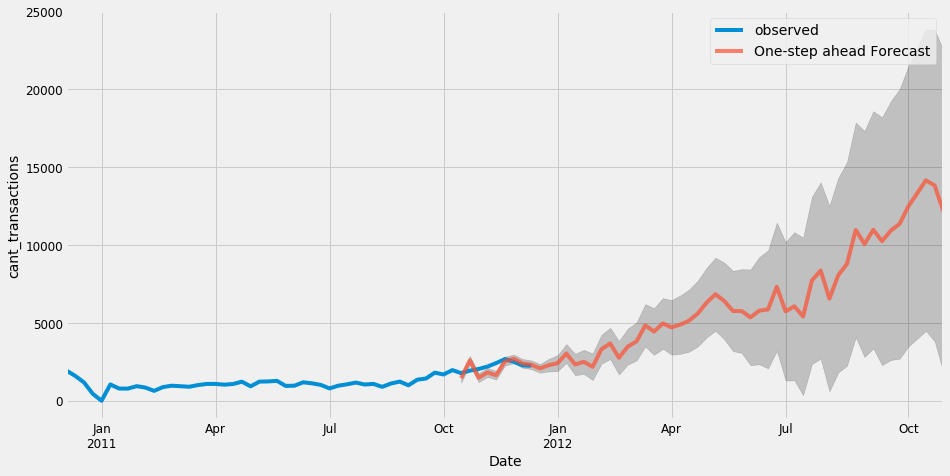

In [43]:

pred = results.get_prediction(start=45, end=100, dynamic=False)
pred_ci = pred.conf_int()
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('cant_transactions')
ax.ticklabel_format(useOffset=False, axis='y')
plt.legend()
plt.show()
